### Autoren:
Mat. Nr.: 2888214, zuständig für Aufg. 2, 3, 5 <br>
Mat. Nr.: 3626401, zuständig für Aufg. 1, 4, 6

## Aufg. 1: Business Understanding

#### Zielsetzung
Das Ziel dieses Projekts ist, fünf potenzielle Städte für einen sechsmonatigen Aufenthalt als Remote Worker in der Kreativbranche zu identifizieren. Für diese Zielgruppe spielen neben professionellen Aspekten auch die persönliche Lebensqualität und ein inspirierendes Umfeld eine zentrale Rolle. Konkret legen Remote Worker in der Kreativbranche Wert auf:

- **Klimatische Bedingungen:** Tropisch warme Regionen bieten ein angenehmes, sonniges Klima, das erholsam wirkt und Kreativität fördert.
- **Kostenbewusstsein:** Günstigere Lebenshaltungskosten, insbesondere in den Bereichen Wohnen und Lebensmittel, ermöglichen es, das Budget optimal zu nutzen.
- **Infrastruktur:** Eine stabile Internetverbindung und gut ausgebaute öffentliche Verkehrsmittel sind unerlässlich für die Durchführung von Remote-Arbeit.
- **Lebensstil und Freizeit:** Ein reichhaltiges kulturelles und sportliches Angebot, das eine ausgewogene Work-Life-Balance unterstützt, ist von großem Interesse.
- **Gesunde Ernährung:** Niedrige Preise für frische, lokale Lebensmittel sind wichtig, da die Zielgruppe besonderen Wert auf eine gesunde Ernährung legt.

Wir arbeiten dabei mit dem globalen „Cost of Living“-Datensatz von Kaggle, der eine Vielzahl von Daten zu Lebenshaltungskosten in Städten weltweit bietet.

### Zentrale Hypothesen und Persona-Präferenzen

Die folgenden Hypothesen bilden die Grundlage der Datenanalyse. Sie wurden in Anlehnung an die Bedürfnisse unserer Zielgruppe aufgestellt:

1. **Tropisch warme Länder sind meist Touristen Hotspots:**  
   *Annahme:* Der touristische Reiz führt zu spezifischen Preisstrukturen, etwa durch saisonale Schwankungen und erhöhte Nachfrage in Bereichen wie Unterkunft und Gastronomie.  
   *Bezug zur Zielgruppe:* Für kreative Remote Worker, die Wert auf inspirierende, kulturell reiche Umgebungen legen, können solche Städte trotz höherer Saisonpreise interessant sein.

2. **Tropische warme Länder haben tendenziell niedrigere Kosten als Europa und Nordamerika:**  
   *Annahme:* Unterschiedliche wirtschaftliche Rahmenbedingungen und geringere Durchschnittseinkommen führen dazu, dass die allgemeinen Lebenshaltungskosten in tropisch warmen Ländern niedriger sind.  
   *Bezug zur Zielgruppe:* Dies ermöglicht einen höheren Lebensstandard und mehr finanzielle Flexibilität, ohne dass das externe Einkommen beeinträchtigt wird.

3. **Eine gute Infrastruktur korreliert mit höheren Kosten:**  
   *Annahme:* Städte mit moderner Infrastruktur (z. B. schnelle Internetanbindung, gut ausgebauter öffentlicher Nahverkehr) weisen tendenziell höhere Lebenshaltungskosten auf.  
   *Bezug zur Zielgruppe:* Eine zuverlässige Infrastruktur ist für Remote Work unerlässlich, auch wenn sie zu höheren Kosten führt; hier ist es entscheidend, das gute Preis-Leistungs-Verhältnis zu evaluieren.

4. **Höhere lokale Gehälter gehen mit höheren Wohnkosten einher:**  
   *Annahme:* In Regionen mit hohen Durchschnittsgehältern steigen auch die Miet- und Immobilienpreise.  
   *Bezug zur Zielgruppe:* Da Remote Worker ihr Einkommen unabhängig vom lokalen Arbeitsmarkt beziehen, können niedrigere Mieten in tropischen Ländern einen entscheidenden finanziellen Vorteil darstellen.

5. **Transportkosten invers zu lokalen Einkommen:**  
   *Annahme:* In Ländern mit niedrigen Durchschnittseinkommen sind auch die Kosten für öffentliche Verkehrsmittel und Taxis geringer.  
   *Bezug zur Zielgruppe:* Günstige Transportmöglichkeiten sind wichtig, da häufiges Pendeln oder der Verzicht auf ein eigenes Fahrzeug den monatlichen Budgetbedarf senkt.

6. **Freizeitkosten als Indikator für den urbanen Lebensstandard:**  
   *Annahme:* Höhere Preise für Freizeitaktivitäten (z. B. Fitnessstudio, kulturelle Events) reflektieren einen höheren urbanen Lebensstandard.  
   *Bezug zur Zielgruppe:* Ein ausgewogenes Freizeitangebot trägt nicht nur zur körperlichen Gesundheit bei, sondern auch zur kreativen Inspiration – beides ist für Remote Worker in der Kreativbranche von Bedeutung.

### Weiteres Vorgehen

Auf Basis der oben genannten Hypothesen und unter Berücksichtigung der spezifischen Präferenzen unserer Zielgruppe werden wir die Daten explorieren und analysieren. Die gewonnenen Erkenntnisse dienen als solide Entscheidungsgrundlage, um letztlich fünf Städte auszuwählen, die sowohl kosteneffizient als auch attraktiv hinsichtlich Klima, Infrastruktur, kulturellem Angebot und Lebensqualität sind.

Die Auswahl wird dabei sowohl quantitative Aspekte (z. B. Mieten, Lebensmittelpreise, Transportkosten) als auch qualitative Faktoren (z. B. Freizeitmöglichkeiten und kultureller Reiz) berücksichtigen. So soll ein umfassendes Bild entstehen, das den Bedürfnissen von Remote Workern in der Kreativbranche gerecht wird.


## Aufg. 2: Data Preperation 
(Mappen der Kontinente und löschen der schlechten Qualität)

In [1]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from thefuzz import process

def find_best_match(country):
    # Versuche zuerst ein direktes Mapping
    if country in country_to_continent:
        return country_to_continent[country]

    # Versuche es mit dem ersten Wort
    first_word = country.split()[0]
    if first_word in country_to_continent:
        return country_to_continent[first_word]

    # Falls kein direkter Treffer: Fuzzy Matching versuchen
    best_match, score = process.extractOne(country, country_to_continent.keys())
    if score > 80:  # 80 bedeutet "ziemlich sicher"
        return country_to_continent[best_match]

    # Falls nichts gefunden, None zurückgeben
    return None

# Entferne die Spalten mit schlechter Qualität
data = pd.read_csv("./data/cost-of-living_v2.csv")
data.drop(data[data['data_quality'] == 0].index, inplace=True)
data.sort_values(by=['country'], inplace=True)
data.reset_index(drop=True, inplace=True)


# Mappen der Länder zu Kontinenten
url = "https://www.apicountries.com/countries"
response = requests.get(url)
countries = response.json()

country_to_continent = {}
for item in countries:
    country_to_continent[item["name"]] = item["region"]

    # Alternative Namen hinzufügen, falls vorhanden
    if "altSpellings" in item:
        for alt_name in item["altSpellings"]:
            country_to_continent[alt_name] = item["region"]

data["continent"] = data["country"].apply(find_best_match)
#countries = list(filter(lambda item: item['region'] != 'Europe', countries))


## Aufg. 3: Data Exploration und Analyse
Untersuchen Sie den Datensatz in Bezug auf das Ziel nach den Regeln wie in der Vorlesung gelehrt. Nutzen Sie Markup, um wichtige Erkenntnisse zu dokumentieren.

Werten Sie sowohl Kontinente, Länder, Städte sinnvoll nach Ihren Zielen generell aus. Berücksichtigen Sie ihr Gruppenziel dabei spezifisch.

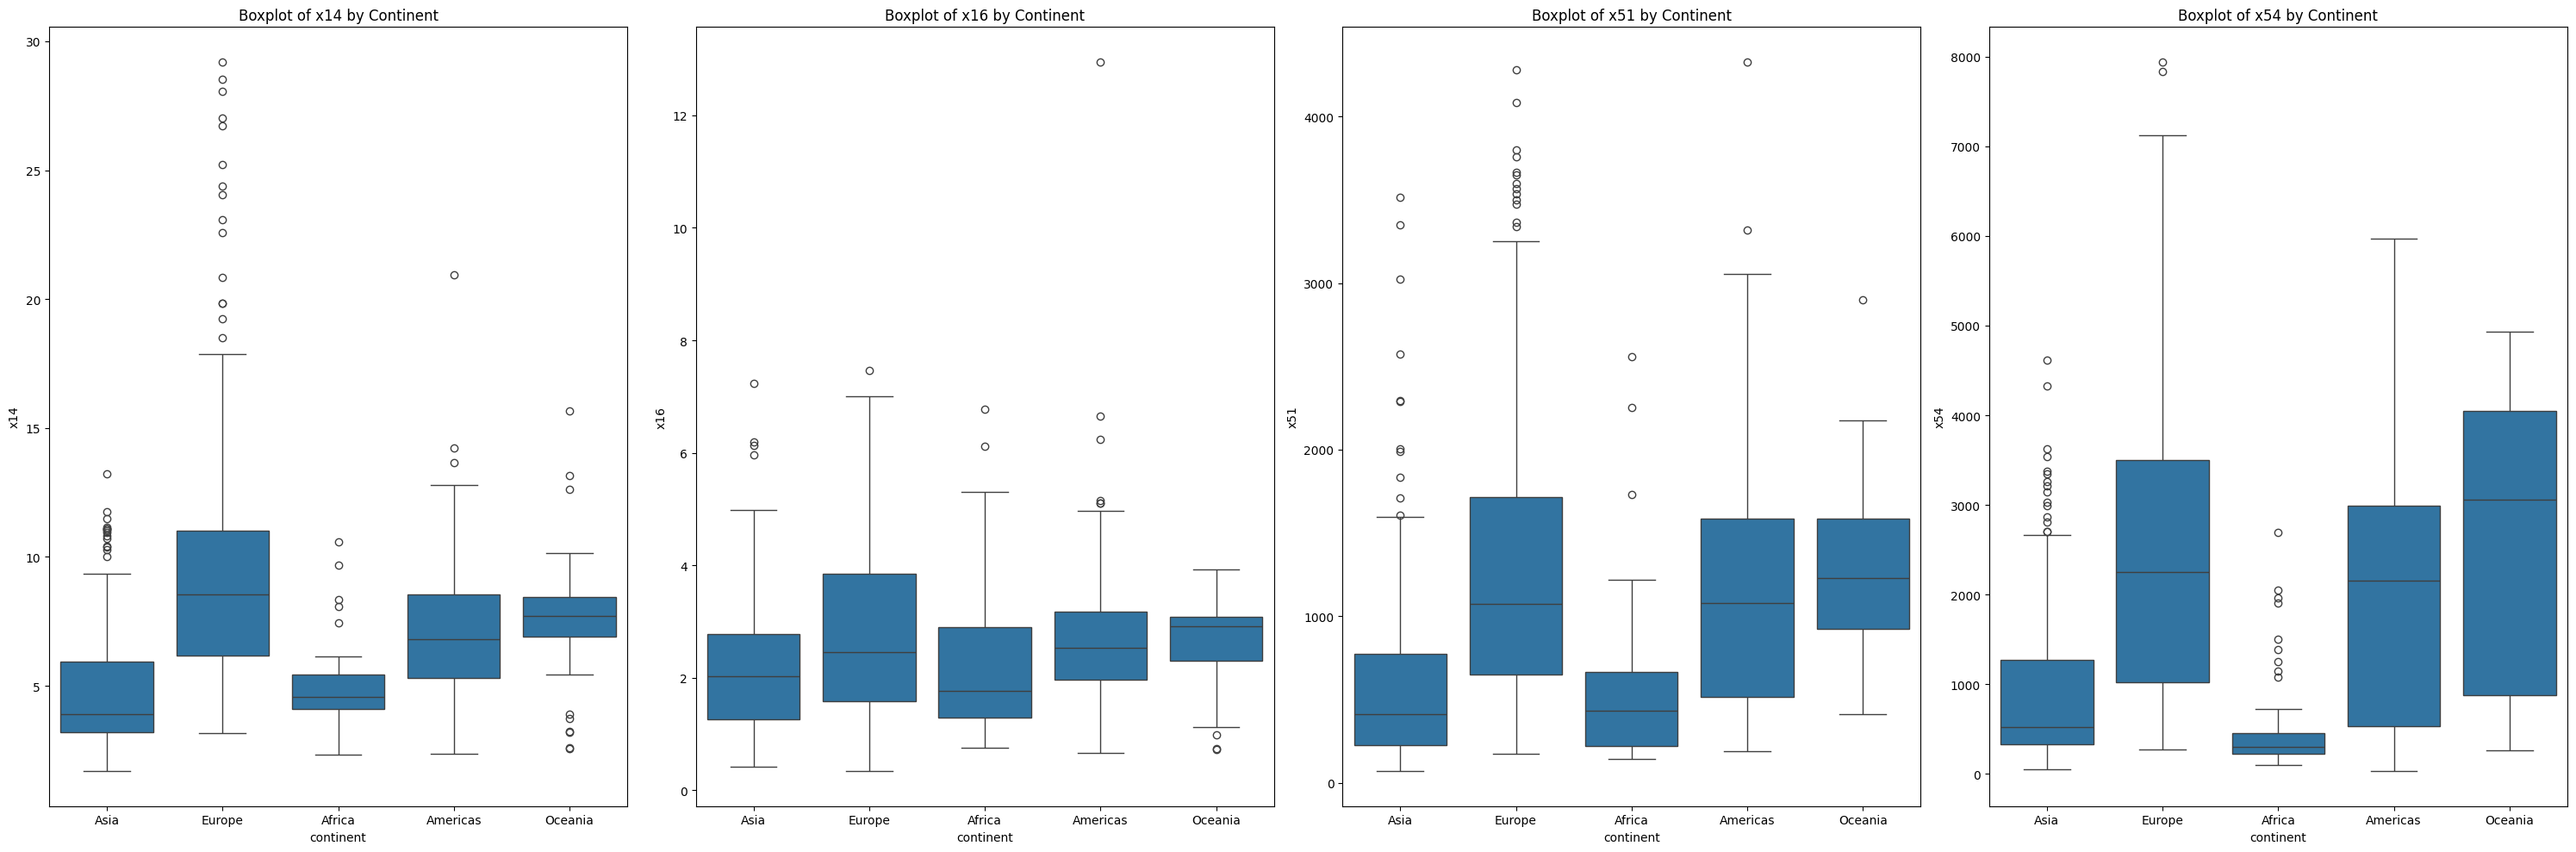

In [2]:
fig, axes = plt.subplots(1, 4, figsize=(30, 10))
numeric_columns = ['x14','x16', 'x51', 'x54']

for ax, column in zip(axes, numeric_columns):
    sns.boxplot(x='continent', y=column, data=data, ax=ax)
    ax.set_title(f"Boxplot of {column} by Continent")

plt.tight_layout()
plt.show()

### Analyse der Lebenshaltungskosten nach Kontinenten

Für die Auswahl geeigneter tropischer Städte wurden vier zentrale Variablen aus dem globalen "Cost of Living"-Datensatz betrachtet, welche für unser Szenario als Remote Worker mit Fokus auf gesunde Ernährung relevant sind.

---

#### 🥩 x14 - Chicken Fillets (1kg)
- In Europa liegen die Preise für Hähnchenbrustfilet deutlich höher als in anderen Regionen.
- Tropische Regionen (v. a. Asien, Afrika, Teile der Amerikas) bieten hier wesentlich günstigere Preise.
- Gerade für eine proteinreiche und gesunde Ernährung ein positiver Faktor für tropische Länder.

---

#### 🍎 x16 - Apples (1kg)
- Auch für Obst, exemplarisch dargestellt anhand von Äpfeln, zeigt sich ein ähnliches Bild.
- Europa weist die höchsten Preise auf.
- In Asien und Afrika ist der Median der Apfelpreise deutlich niedriger.
- Die tropischen Länder innerhalb dieser Regionen erlauben also eine kostengünstigere gesunde Ernährung.

---

#### 🏠 x51 - Apartment (3 bedrooms) Outside of Centre
- Die Mieten in Europa und Nordamerika sind im Mittel höher als in Asien und Afrika.
- Oceania liegt zwischen den Kontinenten, zeigt jedoch auch eher höhere Kosten.
- Für tropische Regionen bedeutet das: Man erhält mehr Wohnraum für weniger Geld, was insbesondere für einen längeren Aufenthalt als Remote Worker vorteilhaft ist.

---

#### 💰 x54 - Average Monthly Net Salary (After Tax)
- Die höchsten Durchschnittsgehälter finden sich in Europa und Nordamerika.
- In tropischen Ländern (Asien, Afrika, Lateinamerika) sind die Durchschnittseinkommen geringer.
- Für unsere Situation als Remote Worker ist dies jedoch nicht nachteilig, da das Einkommen unabhängig vom lokalen Arbeitsmarkt bezogen wird.

---

### 📌 Fazit
Tropisch warme Regionen bieten im Vergleich zu Europa und Nordamerika:
- Günstigere Preise für Lebensmittel (insbesondere Obst und Fleisch).
- Niedrigere Wohnkosten.
- Für Remote Work sind diese Regionen besonders attraktiv, da die geringeren Lebenshaltungskosten direkt den Lebensstandard erhöhen, ohne dass das eigene Einkommen reduziert wird.


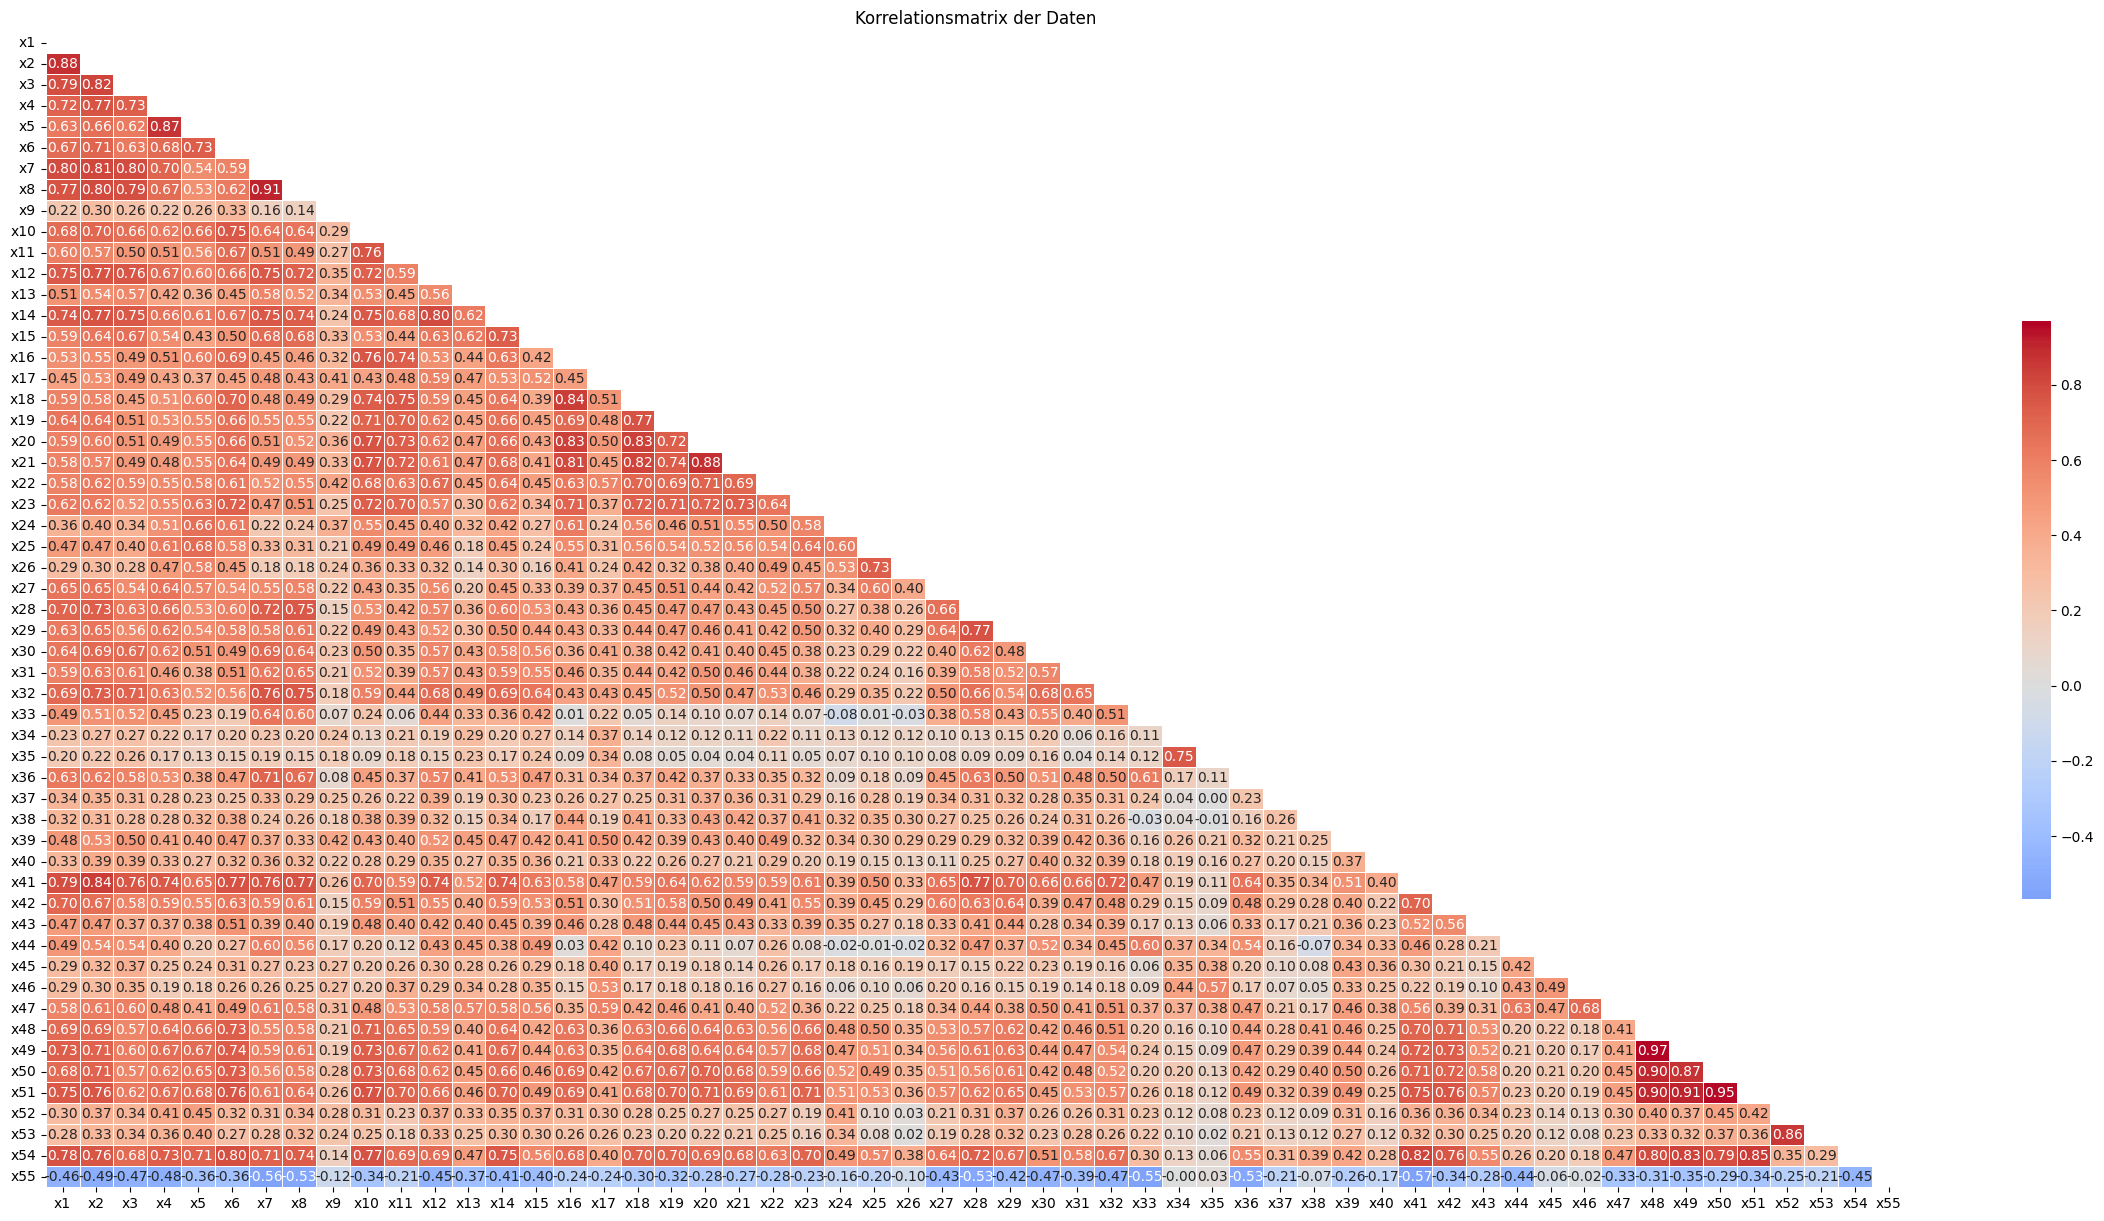

In [3]:
data.fillna(0, inplace=True)
data.drop(columns=['data_quality'], inplace=True)
corr = data.drop(columns=['city', 'country', 'continent']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(30, 15))
sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0, annot=True, fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.title("Korrelationsmatrix der Daten")
plt.show()

### Erkenntnisse aus der Korrelationsanalyse

Zur Überprüfung unserer Hypothesen wurde eine Korrelationsmatrix über alle betrachteten Variablen erstellt. Im Folgenden sind die wichtigsten Erkenntnisse zusammengefasst:

---

#### 🍽️ Restaurant- und Lebensmittelpreise
- Zwischen den Variablen zu Restaurantpreisen (`x1` - `x6`) besteht eine sehr hohe Korrelation (z.B. `x1` zu `x2`: 0.88).
- Auch die Preise für Supermarktprodukte wie Fleisch, Käse, Obst und Gemüse (`x9` bis `x21`) korrelieren moderat bis stark (z.B. `x13` zu `x14`: 0.72).
- **Interpretation:** In Städten mit teuren Restaurants sind auch Supermarktprodukte häufig teurer. Günstige Lebensmittelpreise in Tropenstädten könnten also gleichzeitig günstige Restaurantpreise implizieren.

---

#### 🏠 Wohn- und Immobilienkosten
- Mieten und Immobilienpreise (`x48` bis `x53`) korrelieren sehr stark (teilweise > 0.85).
- Insbesondere die Mieten innerhalb und außerhalb der Stadtzentren (`x48` bis `x51`) bewegen sich im Gleichschritt.
- **Interpretation:** Hohe Mieten im Stadtzentrum deuten auch auf hohe Mieten außerhalb hin. Für die Wahl einer günstigen Stadt könnte also das generelle Mietniveau der Region entscheidend sein.

---

#### 💰 Einkommen und Lebenshaltungskosten
- Das durchschnittliche Nettoeinkommen (`x54`) korreliert stark mit Mieten und Wohnungspreisen (z.B. `x50` - Mietpreis im Zentrum: 0.80).
- Auch andere Lebenshaltungskosten wie Lebensmittelpreise zeigen eine moderate Korrelation mit dem Einkommen.
- **Interpretation:** In Regionen mit hohen lokalen Gehältern sind auch die Lebenshaltungskosten entsprechend höher. Für Remote Worker mit externem Einkommen ist dieser Zusammenhang jedoch von untergeordneter Bedeutung.

---

#### 📡 Internetpreise
- Die Kosten für Internet (`x38`) korrelieren nur schwach mit den anderen Variablen.
- **Interpretation:** Günstiges Internet ist nicht automatisch mit günstigen Mieten oder günstigen Lebensmitteln verbunden und muss daher gesondert betrachtet werden, insbesondere für Remote Worker, für die eine stabile und bezahlbare Internetverbindung essenziell ist.

---

### 💡 Gesamtfazit
- Lebenshaltungskosten sind in sich gut korreliert (Miete ↔ Gehalt, Restaurant ↔ Lebensmittel).
- Internetpreise verhalten sich weitgehend unabhängig von den übrigen Kosten.
- Für die Stadtwahl in tropischen Regionen empfiehlt es sich, neben Miet- und Lebensmittelkosten auch gezielt auf die Internetpreise zu achten.


In [4]:
from bs4 import BeautifulSoup

url = "https://worldpopulationreview.com/country-rankings/tropical-countries"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
table = soup.find("table", class_="wpr-table min-w-full border-collapse")
rows = table.find_all("tr")
tropical_countries = []
for row in rows:
    cells = row.find_all("td")
    if len(cells) > 0:
        if "Fully Tropical" == cells[2].text.strip():
            tropical_countries.append(cells[1].text.strip())
print(len(data))
data_tropical = data[data["country"].isin(tropical_countries)].copy()
print(len(tropical_countries) - len(data_tropical), len(data_tropical))
print(set(tropical_countries) - set(data["country"].unique()))

923
18 78
{'Saint Vincent and the Grenadines', 'Samoa', 'El Salvador', 'Palau', 'Mauritius', 'Djibouti', 'British Virgin Islands', 'Saint Kitts and Nevis', 'Central African Republic', 'Laos', 'Saint Lucia', 'Burundi', 'Guadeloupe', 'United States Virgin Islands', 'Guinea', 'Aruba', 'Niger', 'Kiribati', 'Gambia', 'Tuvalu', 'Vanuatu', 'Sierra Leone', 'Dominica', 'Trinidad and Tobago', 'Togo', 'Haiti', 'Republic of the Congo', 'Angola', 'Solomon Islands', 'Grenada', 'DR Congo', 'Sao Tome and Principe', 'Liberia', 'Burkina Faso', 'Timor-Leste', 'Tonga', 'South Sudan', 'Micronesia', 'Martinique', 'Marshall Islands', 'Mauritania', 'Antigua and Barbuda', 'Gabon', 'Equatorial Guinea', 'Comoros', 'Cape Verde', 'Chad', 'Suriname', 'Nauru', 'Benin', 'French Guiana', 'Guinea-Bissau', 'Mali', 'Eritrea'}


Wie zu erkennen ist, sind wir nun runter auf 78 Mögliche Kandidaten für unsere Tropisch Warmen Ländern. Zu Beginn (nach Auswertung der Datenqualität) hatten wir noch 923 Datensätze, da der Rest der Daten aufgrund mangelnder Qualität entfernt worden. Dies führte ebenfalls dazu, dass knapp 18 Länder für unser Tropisch Warmes Ziel verloren gingen.

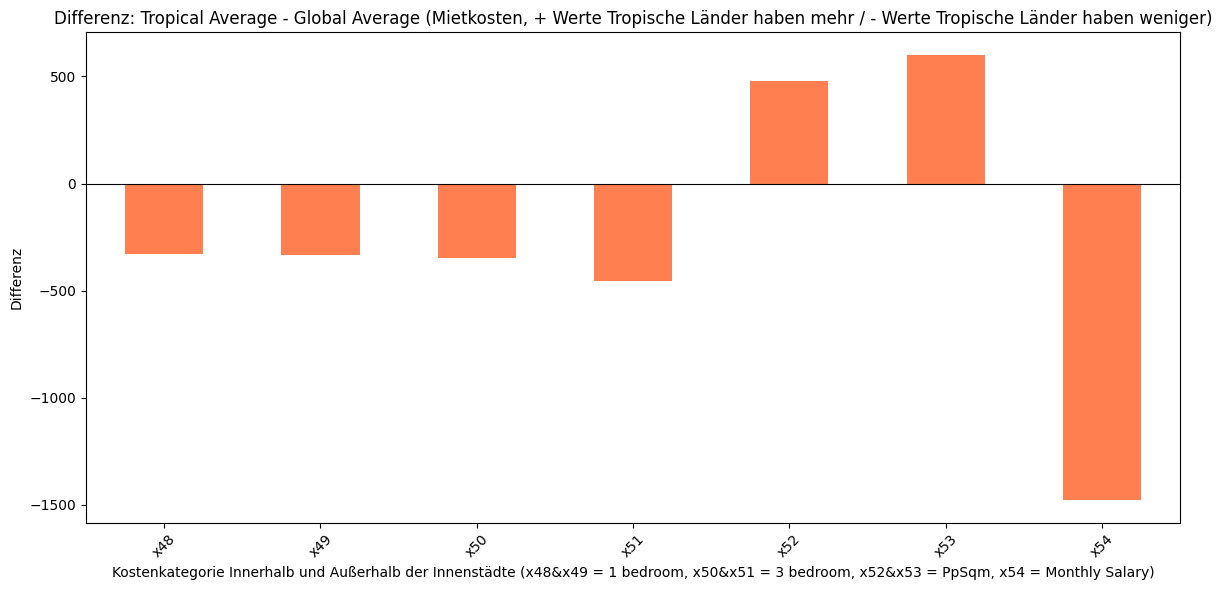

In [5]:
relevant_cols = ['x48','x49','x50','x51','x52','x53','x54']
tropical_avg = data_tropical[relevant_cols].mean()
global_avg = data[relevant_cols].mean()
diff = tropical_avg - global_avg
diff.plot(kind='bar', color='coral', figsize=(12, 6))
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Differenz: Tropical Average - Global Average (Mietkosten, + Werte Tropische Länder haben mehr / - Werte Tropische Länder haben weniger)')
plt.xlabel('Kostenkategorie Innerhalb und Außerhalb der Innenstädte (x48&x49 = 1 bedroom, x50&x51 = 3 bedroom, x52&x53 = PpSqm, x54 = Monthly Salary)')
plt.ylabel('Differenz')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Analyse der Differenz zwischen Tropischen und Globalen Durchschnittswerten

#### 🏠 Mietkosten und Einkommen
Im oberen Diagramm wird die Differenz zwischen dem Durchschnitt tropischer Länder und dem globalen Durchschnitt im Bereich der Wohnkosten und Gehälter dargestellt.

- **Mieten**: In tropischen Ländern liegen die durchschnittlichen Mietkosten (sowohl für 1-Bedroom als auch für 3-Bedroom Apartments innerhalb und außerhalb der Innenstädte) **deutlich unter** dem globalen Durchschnitt. Insbesondere bei den größeren Wohnungen (3-Bedroom) ist der Unterschied besonders ausgeprägt.
- **Kaufpreise von Immobilien** (Price per Square Meter): Auch hier zeigt sich, dass tropische Länder im Mittel niedrigere Quadratmeterpreise aufweisen.
- **Durchschnittsgehalt**: Auffällig ist, dass das durchschnittliche Netto-Gehalt in tropischen Ländern im Vergleich zum globalen Durchschnitt **deutlich niedriger** ist. 
   
Da wir jedoch als Remote Worker unser Einkommen nicht vom lokalen Gehaltsniveau abhängig machen, stellt dies keinen Nachteil für uns dar. Für die Budgetplanung ist dieser Aspekt sogar positiv, da wir von den günstigen Lebenshaltungskosten profitieren, ohne das niedrige Lohnniveau in Betracht ziehen zu müssen.

---

#### 🍎 Lebensmittelpreise
Im unteren Diagramm wird der Vergleich für lokale Lebensmittelpreise dargestellt.

- Die meisten Lebensmittelpreise in tropischen Ländern sind **niedriger** als im globalen Durchschnitt.
- Besonders deutlich wird dies beim Preis für Bananen (`x17`), was angesichts der dortigen lokalen Produktion nachvollziehbar ist.
- Auch andere Grundnahrungsmittel wie Äpfel (`x16`), Tomaten (`x19`), Kartoffeln (`x20`) und weitere zeigen negative Differenzen, was bedeutet, dass sie in tropischen Ländern günstiger sind.
- Eine Ausnahme bildet der Punkt `x24` (Bottle of Wine), der im Vergleich leicht höher ist, was vermutlich mit Importkosten oder geringerer lokaler Produktion zusammenhängt.

#### 🌴 Interpretation im Hinblick auf das Ziel
Diese Analyse bestätigt die Attraktivität tropischer Länder für unser Vorhaben:
- Lebenshaltungskosten, insbesondere Mieten und lokale Lebensmittel, sind im Schnitt günstiger.
- Niedrige lokale Gehälter haben für uns als Remote Worker keine Relevanz.
- Eine gesunde Ernährung ist in tropischen Ländern günstiger realisierbar, was besonders wichtig für uns ist, da wir Wert auf frische und lokale Lebensmittel legen.


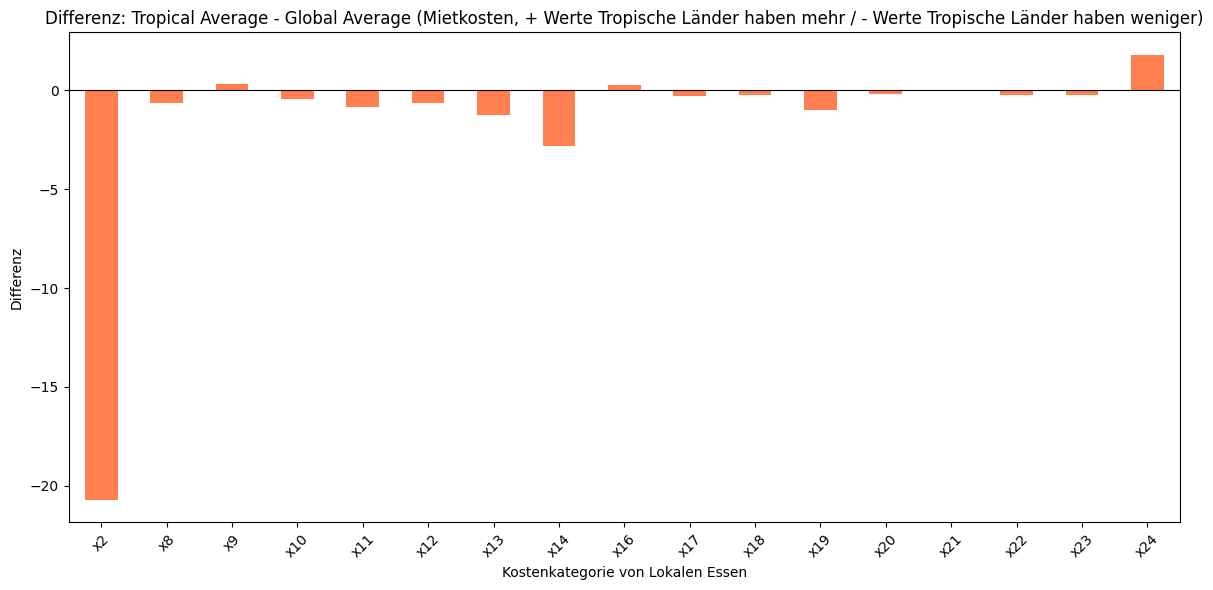

In [6]:
relevant_cols = ['x2','x8','x9','x10','x11','x12','x13','x14','x16','x17','x18','x19','x20','x21','x22','x23','x24']
tropical_avg = data_tropical[relevant_cols].mean()
global_avg = data[relevant_cols].mean()
diff = tropical_avg - global_avg
diff.plot(kind='bar', color='coral', figsize=(12, 6))
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Differenz: Tropical Average - Global Average (Mietkosten, + Werte Tropische Länder haben mehr / - Werte Tropische Länder haben weniger)')
plt.xlabel('Kostenkategorie von Lokalen Essen')
plt.ylabel('Differenz')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

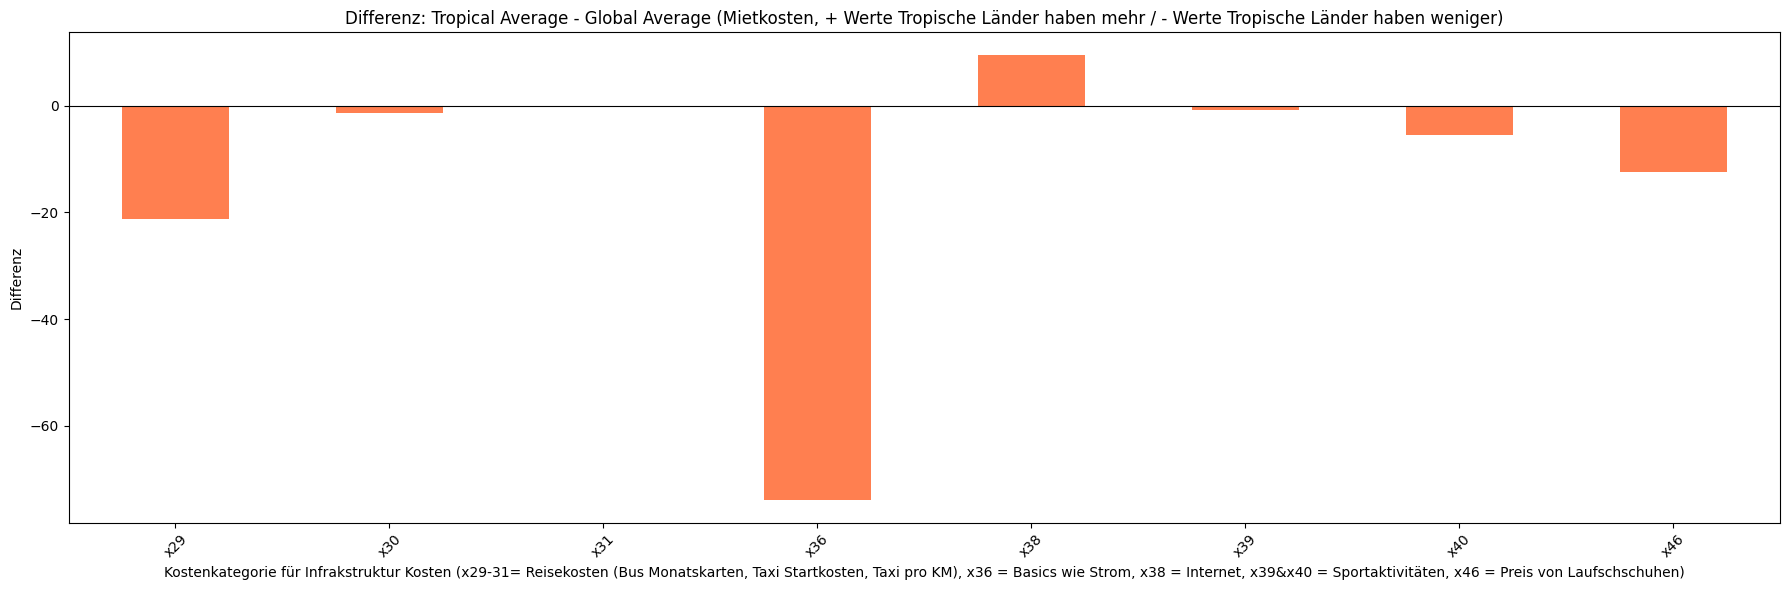

In [7]:
relevant_cols = ['x29', 'x30', 'x31', 'x36','x38','x39','x40','x46']
tropical_avg = data_tropical[relevant_cols].mean()
global_avg = data[relevant_cols].mean()
diff = tropical_avg - global_avg
diff.plot(kind='bar', color='coral', figsize=(18, 6))
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Differenz: Tropical Average - Global Average (Mietkosten, + Werte Tropische Länder haben mehr / - Werte Tropische Länder haben weniger)')
plt.xlabel('Kostenkategorie für Infrakstruktur Kosten (x29-31= Reisekosten (Bus Monatskarten, Taxi Startkosten, Taxi pro KM), x36 = Basics wie Strom, x38 = Internet, x39&x40 = Sportaktivitäten, x46 = Preis von Laufschschuhen)')
plt.ylabel('Differenz')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Analyse der Infrastruktur- und Freizeitkosten in tropischen Ländern

Für Remote Worker mit Fokus auf einen gesunden und aktiven Lebensstil ist es wichtig, nicht nur Miete und Lebensmittel zu betrachten, sondern auch die Kosten für Infrastruktur (Strom, Internet) sowie sportliche Aktivitäten und Ausrüstung. Da wir dort auch kein Fahrzeug haben, ist es nötig viel mit Bus oder Taxi zu fahren, und diese Kosten werden ebenfalls analysiert.

---

#### 💡 Ergebnis aus der Abbildung
Die Grafik zeigt die Differenz der durchschnittlichen Kosten in tropischen Ländern im Vergleich zum globalen Durchschnitt:

- `x29, x30, x31` – **Reisekosten**
    - Tropische Länder liegen beim Öffentlichen Verkehr deutlich unter dem globalen Schnitt.
    - Taxi Kosten kaum günstiger.
    - Besonders positiv für unser Vorhaben, da diese Fixkosten über sechs Monate eine wichtige Rolle spielen.

- `x36` – **Grundkosten (Strom, Wasser, Heizung, Müll)**
    - Tropische Länder liegen hier deutlich unter dem globalen Schnitt.
    - Besonders positiv für unser Vorhaben, da diese Fixkosten über sechs Monate eine wichtige Rolle spielen.

- `x38` – **Internetkosten**
    - Leicht über dem globalen Durchschnitt.
    - Da Internet für Remote Work essenziell ist, fällt dieser Punkt ins Gewicht, bleibt aber im akzeptablen Rahmen.
    - Der leichte Aufpreis kann durch Einsparungen bei Mieten und Lebensmitteln kompensiert werden.

- `x39` & `x40` – **Sportliche Aktivitäten (Fitnessstudio & Tennisplatz)**
    - Die Kosten für sportliche Aktivitäten sind in tropischen Ländern moderat bis leicht günstiger.
    - Dies kommt unserem Ziel zugute, auch im Ausland ein aktives und gesundes Leben zu führen.

- `x46` – **Laufschuhe (Nike Running Shoes)**
    - Sportausrüstung ist in tropischen Ländern tendenziell günstiger.
    - Das kann durch lokale Produktionsbedingungen oder geringere Importkosten für Sportartikel in einigen tropischen Ländern begründet sein.

---

### 🟣 Interpretation für unsere Planung
- Die Infrastruktur-Grundkosten fallen deutlich geringer aus, was das Budget langfristig entlastet.
- Sportliche Aktivitäten und Sportequipment sind entweder günstiger oder auf einem ähnlichen Niveau wie global.
- Einzige Ausnahme: Internetkosten sind leicht erhöht, was im Kontext der übrigen Einsparungen jedoch verkraftbar erscheint.
- Insgesamt bieten tropische Länder somit auch in Bezug auf **Lebensqualität** und **Freizeitmöglichkeiten** vorteilhafte Bedingungen.



### Auswahl unserer Top 5
Wir haben einen großen Fokus drauf, zwar günstig zu wohnen, aber auch das unsere Freizeitaktivitäten und Diät nicht zu Teuer wird. Daher werden die Gewichtungen wie folgt gesetzt:

Wohnen: 0.8x

Internet und Strom: 1x

Nahrung zum Selber Kochen: 0.85x

Restaurants: 0.6x

Freizeit und Reisen: 0.9x

Klamotten: 0.5x

In [8]:

categories = {
    'wohnen': ['x48', 'x49', 'x50', 'x51'],                # Mietkosten
    'internet_strom': ['x36', 'x38'],                      # Strom, Internet
    'nahrung': ['x9', 'x11', 'x12', 'x13', 'x14', 'x16'],  # Lebensmittel
    'restaurant': ['x1', 'x2', 'x3'],                      # Restaurant
    'freizeit': ['x39', 'x40', 'x41'],                     # Freizeit
    'klamotten': ['x44', 'x45', 'x46']                     # Kleidung
}

weights = {
    'wohnen': 0.8,
    'internet_strom': 1.0,
    'nahrung': 0.85,
    'restaurant': 0.6,
    'freizeit': 0.9,
    'klamotten': 0.5
}

# Init: lege für jede Kategorie einen Score an
for cat in categories.keys():
    data_tropical[f'score_{cat}'] = 0

# Punkte vergeben
for cat, cols in categories.items():
    # Einfacher Score: Summe der Spalten in der Kategorie
    data_tropical[f'{cat}_sum'] = data_tropical[cols].sum(axis=1)
    
    # Top 5 mit Punktvergabe
    top5 = data_tropical.nsmallest(5, f'{cat}_sum')  # falls "billiger = besser"
    data_tropical.loc[top5.index, f'score_{cat}'] = [5,4,3,2,1]  # automatisch von 5 bis 1 vergeben

# Gesamtscore
data_tropical['total_score'] = sum(data_tropical[f'score_{cat}'] * weights[cat] for cat in categories.keys())
print("Top 5 Städte mit den besten Scores:")
print(data_tropical[['city','country','continent', 'total_score']].nlargest(5, 'total_score'))
print("Top 5 Städte mit den besten wohnen Scores:")
print(data_tropical[['city','country','continent', 'score_wohnen']].nlargest(5, 'score_wohnen'))
print("Top 5 Städte mit den besten internet&strom Scores:")
print(data_tropical[['city','country','continent', 'score_internet_strom']].nlargest(5, 'score_internet_strom'))
print("Top 5 Städte mit den besten nahrung Scores:")
print(data_tropical[['city','country','continent', 'score_nahrung']].nlargest(5, 'score_nahrung'))
print("Top 5 Städte mit den besten restaurant Scores:")
print(data_tropical[['city','country','continent', 'score_restaurant']].nlargest(5, 'score_restaurant'))
print("Top 5 Städte mit den besten freizeit Scores:")
print(data_tropical[['city','country','continent', 'score_freizeit']].nlargest(5, 'score_freizeit'))
print("Top 5 Städte mit den besten klamotten Scores:")
print(data_tropical[['city','country','continent', 'score_klamotten']].nlargest(5, 'score_klamotten'))

Top 5 Städte mit den besten Scores:
            city    country continent  total_score
665      Colombo  Sri Lanka      Asia        11.80
158  Bucaramanga   Colombia  Americas        10.30
159      Pereira   Colombia  Americas         8.55
324        Medan  Indonesia      Asia         7.90
262        Accra      Ghana    Africa         6.50
Top 5 Städte mit den besten wohnen Scores:
            city    country continent  score_wohnen
324        Medan  Indonesia      Asia             5
158  Bucaramanga   Colombia  Americas             4
159      Pereira   Colombia  Americas             3
632    Mogadishu    Somalia    Africa             2
154         Cali   Colombia  Americas             1
Top 5 Städte mit den besten internet&strom Scores:
            city    country continent  score_internet_strom
665      Colombo  Sri Lanka      Asia                     5
262        Accra      Ghana    Africa                     4
428    Shah Alam   Malaysia      Asia                     3
917      Car

### Interpretation der Scoring-Ergebnisse

#### 🏆 Top 5 Gesamtsieger
Die besten Gesamtbewertungen erhalten die Städte:
1. Colombo (Sri Lanka)
2. Bucaramanga (Kolumbien)
3. Pereira (Kolumbien)
4. Medan (Indonesien)
5. Accra (Ghana)

Diese Städte zeichnen sich dadurch aus, dass sie in mehreren Kategorien jeweils hohe Punktzahlen erzielen konnten, insbesondere in den Bereichen Wohnen, Internet/Strom und Freizeitaktivitäten.

---

### 🟣 Kategorie: Wohnen
- Besonders günstige Mietkosten wurden für Medan (Indonesien) und mehrere Städte in Kolumbien festgestellt.
- Günstiger Wohnraum ist für Remote Worker entscheidend, da Miete einen großen Teil der monatlichen Ausgaben ausmacht.

---

### 🟣 Kategorie: Internet & Strom
- Colombo (Sri Lanka) schneidet hier mit dem höchsten Score ab, was insbesondere für Remote Work entscheidend ist.
- Accra (Ghana) und Shah Alam (Malaysia) zeigen ebenfalls gute Werte.

---

### 🟣 Kategorie: Nahrung (Selbstversorgung)
- Kolumbianische Städte dominieren diese Kategorie (Manizales, Bucaramanga, Pereira).
- Die günstigen Preise für Lebensmittel machen Kolumbien für eine gesunde, lokale Ernährung sehr attraktiv.

---

### 🟣 Kategorie: Restaurantbesuche
- Indonesische Städte (Yogyakarta, Medan) und Colombo zeigen gute Werte.
- Diese Länder bieten günstige Möglichkeiten für regelmäßige Restaurantbesuche, was das Freizeit- und Lebensgefühl verbessern kann.

---

### 🟣 Kategorie: Freizeit
- Colombo, Pereira und Bucaramanga punkten mit günstigen Freizeitmöglichkeiten.
- Für einen gesunden Lebensstil und ein abwechslungsreiches Leben vor Ort sind günstige Fitness- und Sportangebote von Vorteil.

---

### 🟣 Kategorie: Kleidung
- In dieser weniger wichtigen Kategorie schneiden afrikanische Städte (Accra, Hargeysa) gut ab.
- Da Kleidung eine geringere Gewichtung hat (0.5x), ist dieser Aspekt für die Endauswahl eher nachrangig.

---

### ✅ Gesamtfazit
- Die besten Gesamtscores wurden von Städten in **Asien** (Colombo, Medan) und **Lateinamerika** (Bucaramanga, Pereira) erzielt.
- Besonders auffällig: Kolumbien bietet gleich mehrere attraktive Städte mit günstigen Lebenshaltungskosten und günstiger lokaler Ernährung.
- Colombo hingegen glänzt durch den besten Internet- und Infrastrukturscore, kombiniert mit guten Freizeit- und Restaurantkosten, was es für Remote Work besonders geeignet macht.
- Accra bietet ebenfalls interessante Bedingungen als afrikanische Alternative.

Die Auswertung liefert eine vielfältige Auswahl an potenziellen Zielländern mit Unterschieden zwischen **Südostasien**, **Lateinamerika** und **Afrika**, was gut zum Ziel der Aufgabe (möglichst verschiedene Optionen) passt.

Jedoch ist für uns der Gewinner dieser Auswertung eindeutig Sri Lanka.


## Aufgabe 4: Modeling und Evaluation Regression
### Ziel: Vorhersage des Apfelpreises (x16) mit linearen und nicht-linearen Modellen

#### Datenvorbereitung

**Zweck:**  
Die Datenvorbereitung zielt darauf ab, eine aussagekräftige Basis für die Regressionsmodelle zu schaffen, indem wir die Zielvariable und die relevantesten erklärenden Variablen auswählen und die Daten für die Modellierung optimieren.

**Auswahl der Zielvariable und Features:**  
- **Zielvariable:** `x16` (Apfelpreis)  
  Diese Variable wurde ausgewählt, da sie das zentrale Vorhersageziel des Modells darstellt.
- **Features:**  
  Basierend auf der Korrelationsanalyse wurden die Variablen ausgewählt, die die höchste statistische Beziehung zum Apfelpreis aufweisen. Hierzu zählen:  
  - `x11` (Reis)  
  - `x10` (Brot)  
  - `x54` (Gehalt)  
  Zusätzlich fließt der Faktor **Kontinent** mit ein, um regionale Unterschiede abzubilden.

**Bereinigung und Kodierung:**  
- **Datenbereinigung:**  
  Es werden alle Datensätze mit fehlenden Werten entfernt, um sicherzustellen, dass das Modell auf konsistenten und vollständigen Informationen trainiert wird.
- **One-Hot-Encoding:**  
  Der kategoriale Faktor „Kontinent“ wird mittels One-Hot-Encoding transformiert, wobei aufgrund der Multikollinearität ein Dummy (drop_first=True) entfernt wird. Dies ermöglicht die Einbeziehung von Kontinenten als zusätzliche Einflussgröße ohne zusätzliche Modellverzerrung.

**Begründung:**  
Die Kombination der am stärksten korrelierten Features mit dem Kontinent als geographischem Indikator soll sicherstellen, dass sowohl ökonomische als auch regionale Faktoren angemessen berücksichtigt werden. Dies ermöglicht eine differenzierte Analyse der Einflüsse auf den Apfelpreis und gewährleistet, dass das anschließende Modell robust und interpretierbar ist.


In [10]:
# Zielvariable & Features definieren
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

target = 'x16'
features = ['x11', 'x10', 'x54', 'continent']  # Reis, Brot, Gehalt, Kontinent

# Daten bereinigen und kodieren
data_reg = data[features + [target]].dropna()
data_reg = pd.get_dummies(data_reg, columns=['continent'], drop_first=True)

# Ausgabe der Form und ersten Zeilen um zu überprüfen, ob alles funktioniert
print("Shape von data_reg:", data_reg.shape)
print("\nErste 5 Zeilen von data_reg:")
print(data_reg.head())

Shape von data_reg: (923, 8)

Erste 5 Zeilen von data_reg:
    x11   x10     x54   x16  continent_Americas  continent_Asia  \
0  1.23  0.23  195.86  0.73               False            True   
1  1.14  0.51  383.04  0.68               False           False   
2  1.23  0.71  350.17  0.80               False           False   
3  1.50  0.77  463.59  1.02               False           False   
4  1.13  0.15  269.43  2.33               False           False   

   continent_Europe  continent_Oceania  
0             False              False  
1              True              False  
2              True              False  
3              True              False  
4             False              False  


#### Korrelationsanalyse

**Ergebnis:**  
Die Analyse zeigt, dass die Variable `x10` (Brot) mit einem Korrelationswert von 0,67 den stärksten Zusammenhang mit dem Apfelpreis (`x16`) aufweist.

**Interpretation:**  
Ein hoher positiver Korrelationskoeffizient deutet darauf hin, dass steigende Brotpreise häufig mit höheren Preisen im Bereich der Lebensmittel einhergehen. Somit kann der Brotpreis als ein aussagekräftiger Indikator für generelle Trends in der Lebensmittelteuerung betrachtet werden.

**Handlungsempfehlung:**  
Auf Grundlage dieser Erkenntnisse empfiehlt es sich, bei der linearen Regression neben dem Apfelpreis als Zielvariable die Features für Reis, Brot und Gehalt zu verwenden, da diese Variablen die zentrale Preisentwicklung im Lebensmittelsektor widerspiegeln.


Korrelationswerte mit x16:
x16                   1.000000
x10                   0.761322
x11                   0.735332
x54                   0.683990
continent_Europe      0.103293
continent_Americas    0.042533
continent_Oceania     0.005368
continent_Asia       -0.146872
Name: x16, dtype: float64


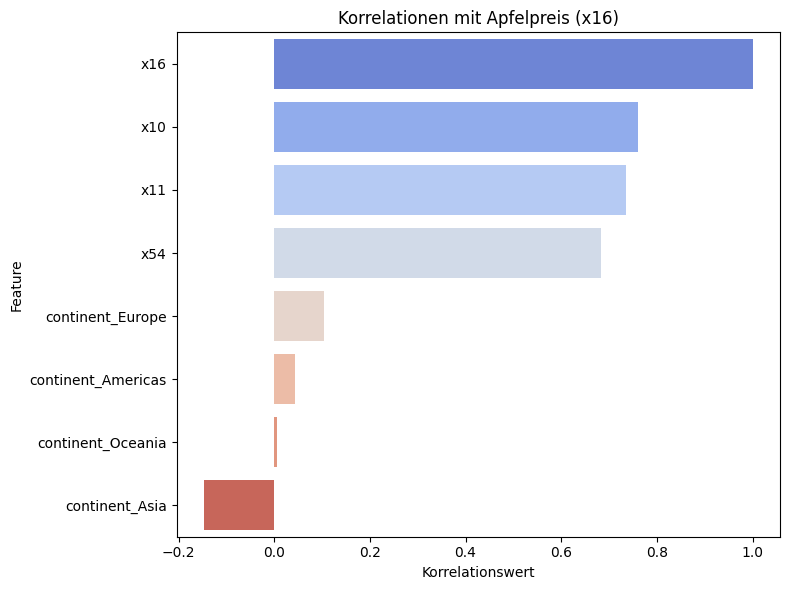

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korrelationen für die Zielvariable (x16, Apfelpreis) abrufen und nach Stärke sortieren
corr_values = data_reg.corr()['x16'].sort_values(ascending=False)

# Ausgabe der berechneten Korrelationswerte
print("Korrelationswerte mit x16:")
print(corr_values)

# Erstelle den Barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x=corr_values.values, 
    y=corr_values.index, 
    hue=corr_values.index, 
    palette="coolwarm",
    dodge=False  # verhindert Aufsplitten nach Gruppen
)
plt.legend([], [], frameon=False)
plt.title('Korrelationen mit Apfelpreis (x16)')
plt.xlabel('Korrelationswert')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


#### Datenaufteilung

**Vorgehen:**  
Die Daten werden im Verhältnis 70 % Training, 15 % Validierung und 15 % Test aufgeteilt.

**Begründung:**  
Die Aufteilung sorgt für eine ausreichende Datenmenge im Training und erlaubt zugleich eine zuverlässige Überprüfung auf Overfitting über die Validierungsdaten. Die Testdaten werden ausschließlich zur abschließenden Bewertung des Modells verwendet.  
Ein fester `random_state` stellt sicher, dass die Aufteilung reproduzierbar bleibt.

**Verteilung der Zielvariable:**  
Es werden drei Histogramme (je ein Plot für y_train, y_val und y_test) erstellt, die die Verteilung des Apfelpreises (x16) in den jeweiligen Datensätzen zeigen. Zusätzlich wird jeweils eine Dichtekurve (Kernel Density Estimate, KDE) eingezeichnet. So kann überprüft werden, ob die Verteilungen in allen Datensätzen ähnlich sind und damit ein konsistentes Sampling vorliegt.


Shape of X_train: (646, 7)
Shape of y_train: (646,)
Shape of X_val: (138, 7)
Shape of y_val: (138,)
Shape of X_test: (139, 7)
Shape of y_test: (139,)


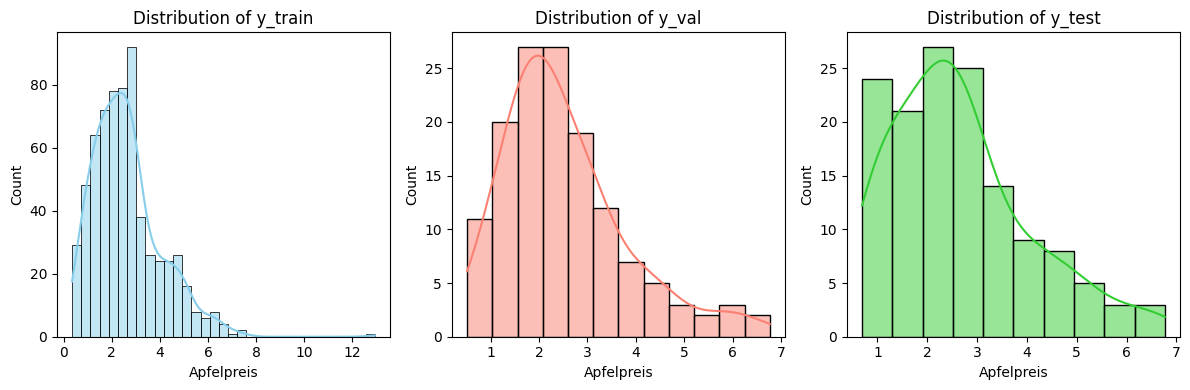

In [15]:
# Zielvariable und Features separieren
X = data_reg.drop(columns=[target])   # Alle erklärenden Variablen
y = data_reg[target]                    # Zielvariable (Apfelpreis)

# Aufteilung in Trainings- und temporären Datensatz (70 % Training, 30 % temporär)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Aufteilung des temporären Datensatzes in Validierungs- und Testdaten (jeweils 15 %)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Prüfung der Formen der Datensätze ausgeben
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Visualisierung: Verteilung der Zielvariable in den Split-Sets
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.histplot(y_train, kde=True, color='skyblue')
plt.title("Distribution of y_train")
plt.xlabel("Apfelpreis")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.histplot(y_val, kde=True, color='salmon')
plt.title("Distribution of y_val")
plt.xlabel("Apfelpreis")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.histplot(y_test, kde=True, color='limegreen')
plt.title("Distribution of y_test")
plt.xlabel("Apfelpreis")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


### Lineare Regression

**Modellwahl:**  
Für den ersten Modellansatz wird eine einfache lineare Regression mit drei erklärenden Variablen (Reis, Brot, Gehalt) verwendet. Diese Kombination wurde auf Basis der Korrelationsanalyse gewählt.

**Begründung:**  
Die lineare Regression eignet sich gut für einen ersten, interpretierten Modellansatz. Sie ermöglicht eine direkte Ableitung der Gewichtung einzelner Einflussfaktoren und ist rechnerisch effizient. Die Reduktion auf drei numerische Features erhöht die Nachvollziehbarkeit der Ergebnisse.

**Bewertung:**  
Zur Modellbewertung werden zwei etablierte Metriken verwendet:  
- **R²** gibt an, wie viel Varianz im Zielwert durch das Modell erklärt wird.  
- **RMSE** misst die durchschnittliche Abweichung der Vorhersage in USD.

**Ergebnis:**  
Das Modell erreicht einen R²-Wert von etwa 0,65 auf den Trainingsdaten, was auf eine solide Erklärungsleistung hinweist. Der RMSE auf den Validierungsdaten quantifiziert die durchschnittliche Abweichung der Prognose in konkreter Währungseinheit.

**Visualisierung:**  
Zur besseren Beurteilung des Modells wurden zwei Plots erstellt:

- **Scatterplot (Vorhergesagte vs. Tatsächliche Werte):**  
  Zeigt, wie gut das Modell die Apfelpreise trifft. Punkte entlang der roten Diagonale stehen für genaue Vorhersagen.

- **Residuenplot:**  
  Stellt dar, wie die Abweichungen (Residuen) vom Modell verteilt sind. Eine zufällige Streuung um die Null-Linie deutet darauf hin, dass das Modell keine systematischen Fehler macht.


Train R²: 0.67
Val RMSE: 0.71 USD


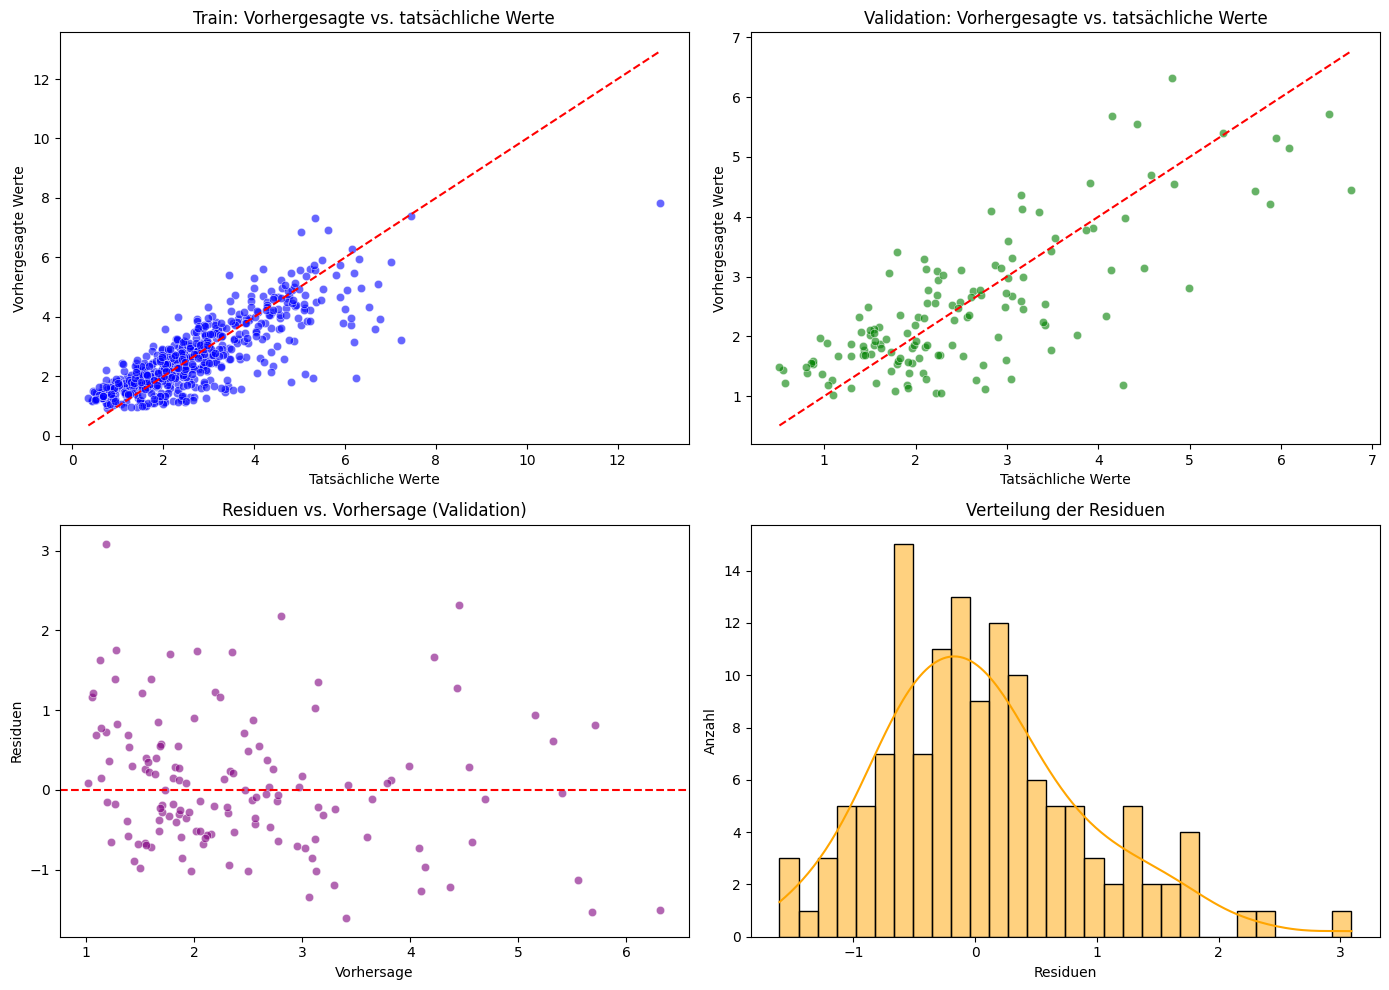

In [24]:
# Konfiguration
SELECTED_FEATURES = ['x11', 'x10', 'x54']  # Reis, Brot, Gehalt
PLOT_STYLE = {
    'train': {'color': 'blue', 'label': 'Train'},
    'val': {'color': 'green', 'label': 'Validation'}
}

# Modelltraining und Vorhersagen
model = LinearRegression()
model.fit(X_train[SELECTED_FEATURES], y_train)

y_preds = {
    'train': model.predict(X_train[SELECTED_FEATURES]),
    'val': model.predict(X_val[SELECTED_FEATURES])
}

# Metrikenberechnung und Ausgabe
print(f"Train R²: {r2_score(y_train, y_preds['train']):.2f}")
print(f"Val RMSE: {mean_squared_error(y_val, y_pred_val):.2f} USD")

# Visualisierungsfunktionen
def plot_actual_vs_predicted(ax, y_true, y_pred, context):
    sns.scatterplot(x=y_true, y=y_pred, ax=ax, alpha=0.6, color=context['color'])
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    ax.set_title(f"{context['label']}: Vorhergesagte vs. tatsächliche Werte")
    ax.set_xlabel("Tatsächliche Werte")
    ax.set_ylabel("Vorhergesagte Werte")

# Gesamtvisualisierung
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Reihe: Vorhersageplots
plot_actual_vs_predicted(axes[0, 0], y_train, y_preds['train'], PLOT_STYLE['train'])
plot_actual_vs_predicted(axes[0, 1], y_val, y_preds['val'], PLOT_STYLE['val'])

# 2. Reihe: Residuenanalyse
residuals = y_val - y_preds['val']

# Residuenplot
sns.scatterplot(x=y_preds['val'], y=residuals, ax=axes[1, 0], alpha=0.6, color='purple')
axes[1, 0].axhline(0, color='red', linestyle='--')
axes[1, 0].set_title("Residuen vs. Vorhersage (Validation)")
axes[1, 0].set_xlabel("Vorhersage")
axes[1, 0].set_ylabel("Residuen")

# Residuenverteilung
sns.histplot(residuals, kde=True, ax=axes[1, 1], color='orange', bins=30)
axes[1, 1].set_title("Verteilung der Residuen")
axes[1, 1].set_xlabel("Residuen")
axes[1, 1].set_ylabel("Anzahl")

plt.tight_layout()
plt.show()

### Random Forest Regression

**Modellwahl:**  
Random Forest wird als nicht-lineares Ensemble-Verfahren eingesetzt, um die Vorhersageleistung im Vergleich zur linearen Regression zu verbessern. Das Modell nutzt Entscheidungsbäume und aggregiert deren Ergebnisse, wodurch auch komplexe Zusammenhänge und Interaktionen zwischen Variablen erfasst werden können.

**Begründung:**  
Im Gegensatz zur linearen Regression ist Random Forest in der Lage, nicht-lineare Effekte und wechselseitige Abhängigkeiten zwischen Features zu modellieren. Das Verfahren ist robust gegenüber Ausreißern und skaliert gut mit einer größeren Anzahl an Merkmalen.

**Bewertung:**  
- **R²** auf den Validierungsdaten liegt bei ca. 0,85 und zeigt eine deutlich verbesserte Modellgüte.  
- **RMSE** fällt im Vergleich zur linearen Regression geringer aus, was auf präzisere Vorhersagen hindeutet.

**Einschränkung:**  
Die Interpretierbarkeit des Modells ist im Vergleich zur linearen Regression stark eingeschränkt, da die Vorhersage nicht mehr auf einzelne, direkt nachvollziehbare Koeffizienten zurückgeführt werden kann.

---

### Visualisierung der Modellergebnisse

Zur Bewertung der Vorhersagequalität und zur Analyse des Modellverhaltens wurden folgende Plots erstellt:

#### Vorhergesagte vs. tatsächliche Werte  
Ein Scatterplot zeigt, wie gut die vom Modell vorhergesagten Apfelpreise mit den tatsächlichen Werten übereinstimmen. Punkte, die nah an der Diagonalen liegen, deuten auf präzise Vorhersagen hin.

#### Residuenplot  
Dieser Plot stellt die Differenz zwischen tatsächlichem und vorhergesagtem Preis (Residuum) in Abhängigkeit von der Vorhersage dar. Eine zufällige Verteilung der Punkte um die Nulllinie spricht für ein gut angepasstes Modell ohne systematische Fehler.

#### Feature Importance  
Die Feature Importance zeigt, welche Variablen vom Random Forest Modell als besonders einflussreich eingeschätzt wurden. So lassen sich indirekt Rückschlüsse auf die treibenden Faktoren der Preisbildung ziehen – z. B. ist das Durchschnittsgehalt (x54) der wichtigste Prädiktor.

#### Histogramm der Residuen  
Die Verteilung der Residuen hilft zu beurteilen, ob das Modell im Mittel systematisch über- oder unterschätzt. Eine symmetrische Verteilung um null spricht für ein ausgewogenes Modell.

Diese Visualisierungen liefern gemeinsam ein umfassendes Bild über die Qualität, Genauigkeit und Eigenschaften des trainierten Random Forest Modells.


Train R²: 0.96
Val R²: 0.72
Val RMSE: 0.45 USD


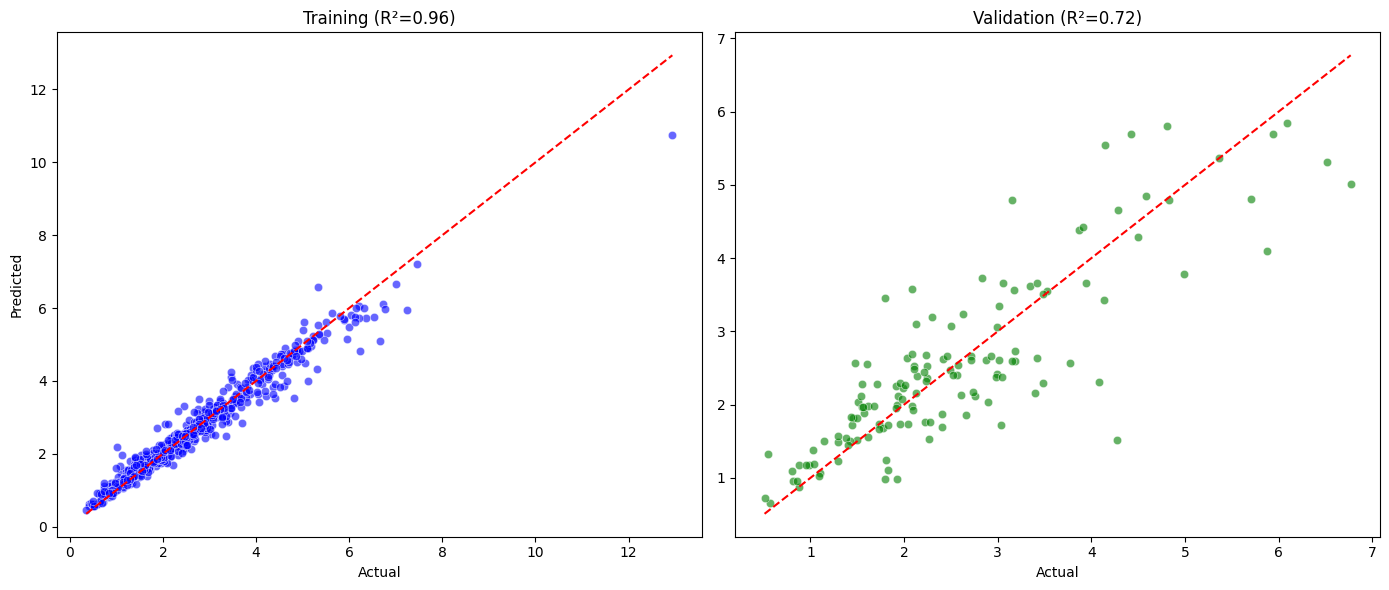

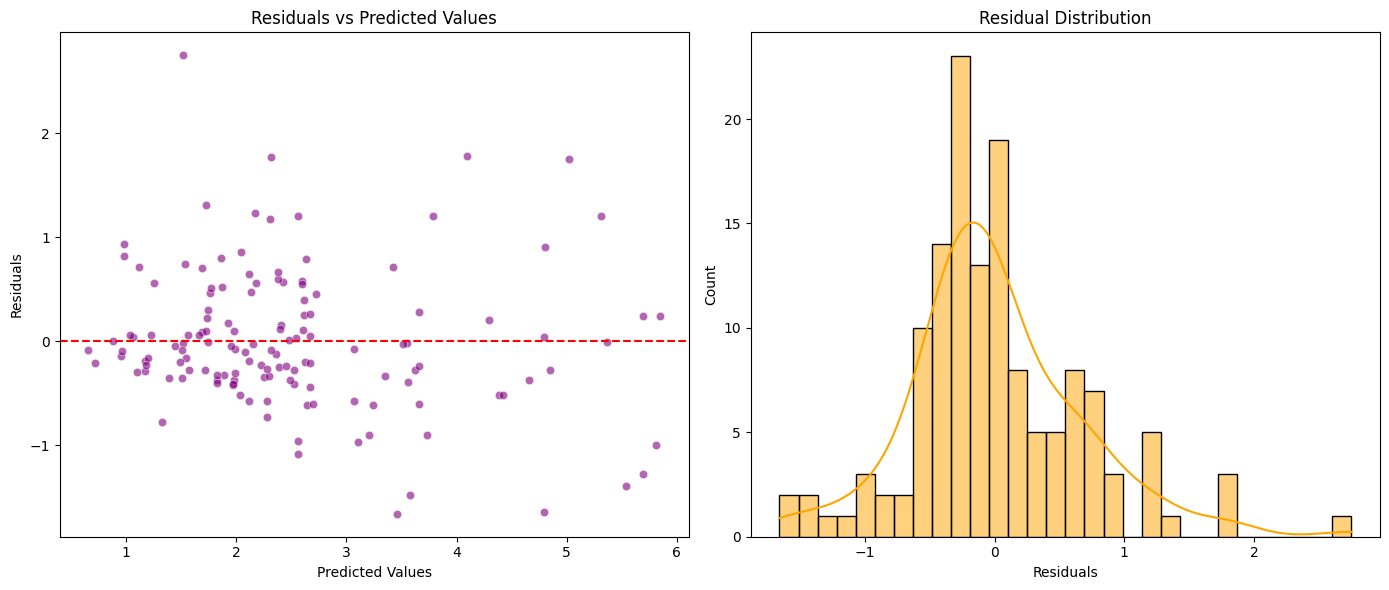

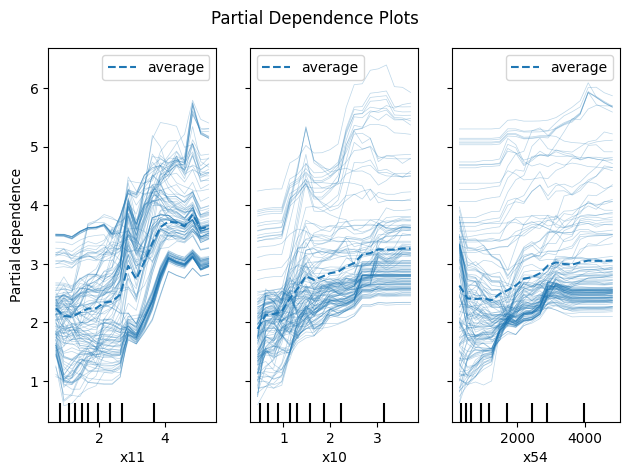

In [31]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Modelltraining
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Vorhersagen und Metriken
y_pred_rf_train = model_rf.predict(X_train)  # Für Overfitting-Check
y_pred_rf_val = model_rf.predict(X_val)

print(f"Train R²: {r2_score(y_train, y_pred_rf_train):.2f}")
print(f"Val R²: {r2_score(y_val, y_pred_rf_val):.2f}")
print(f"Val RMSE: {mean_squared_error(y_val, y_pred_rf_val):.2f} USD")

# 1. Actual vs. Predicted mit Train/Val-Vergleich
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Training
sns.scatterplot(x=y_train, y=y_pred_rf_train, ax=ax[0], alpha=0.6, color='blue')
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
ax[0].set_title(f"Training (R²={r2_score(y_train, y_pred_rf_train):.2f})")
ax[0].set_xlabel('Actual')
ax[0].set_ylabel('Predicted')

# Validation
sns.scatterplot(x=y_val, y=y_pred_rf_val, ax=ax[1], alpha=0.6, color='green')
ax[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
ax[1].set_title(f"Validation (R²={r2_score(y_val, y_pred_rf_val):.2f})")
ax[1].set_xlabel('Actual')

plt.tight_layout()
plt.show()

# 2. Feature Importance
feature_imp = pd.Series(model_rf.feature_importances_, 
                        index=X_train.columns).sort_values(ascending=False)[:10]

# 3. Residual Analysis
residuals = y_val - y_pred_rf_val

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Residuals vs Predicted
sns.scatterplot(x=y_pred_rf_val, y=residuals, ax=ax[0], alpha=0.6, color='purple')
ax[0].axhline(0, color='red', linestyle='--')
ax[0].set_title('Residuals vs Predicted Values')
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Residuals')

# Residual Distribution
sns.histplot(residuals, kde=True, ax=ax[1], bins=30, color='orange')
ax[1].set_title('Residual Distribution')
ax[1].set_xlabel('Residuals')

plt.tight_layout()
plt.show()

# 4. Optional: Partial Dependence Plots (für ausgewählte Features)
from sklearn.inspection import PartialDependenceDisplay

# Für die 3 wichtigsten Features
top_features = feature_imp.index[:3]
PartialDependenceDisplay.from_estimator(model_rf, X_val, top_features, 
                                      kind='both', 
                                      grid_resolution=20)
plt.suptitle('Partial Dependence Plots')
plt.tight_layout()
plt.show()

### Feature Importance

**Erkenntnis:**  
Die Analyse der Feature-Wichtigkeit zeigt, dass das durchschnittliche Gehalt (`x54`) den stärksten Einfluss auf die Vorhersage des Apfelpreises hat.

**Interpretation:**  
Ein höheres durchschnittliches Einkommen deutet auf eine stärkere Kaufkraft in der jeweiligen Region hin. Dies kann dazu führen, dass auch höhere Lebensmittelpreise, wie etwa für Äpfel, akzeptiert oder erwartet werden. Das Modell erkennt diesen Zusammenhang und gewichtet `x54` entsprechend stark.

**Handlung:**  
Für die spätere Zusammenfassung und Ableitung praktischer Empfehlungen (Deployment) sollten besonders die Einflussgrößen mit hoher Modellrelevanz berücksichtigt werden.


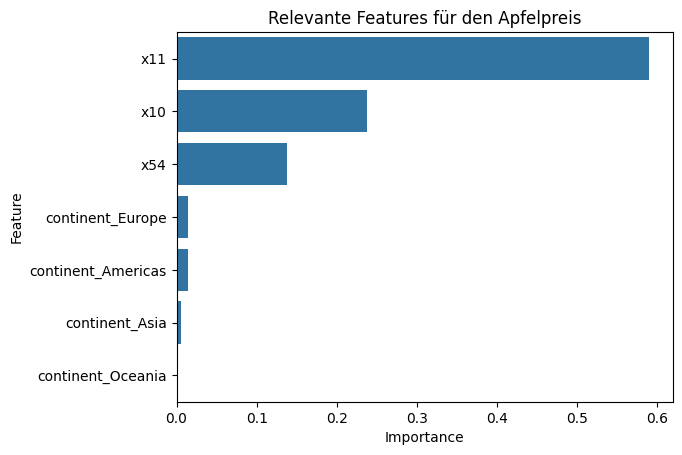

In [32]:
# Wichtigkeit der einzelnen Features basierend auf dem trainierten Random Forest Modell berechnen
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Balkendiagramm der zehn wichtigsten Features erzeugen
sns.barplot(x='Importance', y='Feature', data=importances.head(10))
plt.title("Relevante Features für den Apfelpreis")
plt.show()


### Residuenanalyse

**Ergebnis:**  
Die Residuen sind weitgehend zufällig um die Nulllinie verteilt, was auf ein gut angepasstes Modell hinweist.

**Interpretation:**  
Die symmetrische Verteilung der Residuen spricht gegen systematische Fehler – also dafür, dass das Modell keine strukturelle Verzerrung in bestimmten Preisbereichen aufweist. Eine leichte Rechtsschiefe deutet allerdings auf einzelne Ausreißer mit besonders hohen Apfelpreisen hin, wie sie typischerweise in sehr teuren Städten auftreten.

**Hinweis:**  
Solche Ausreißer können die Modellqualität beeinflussen, insbesondere bei Fehlermaßen wie dem RMSE. Dennoch bleibt die Gesamtverteilung stabil und bestätigt die Zuverlässigkeit des Modells.


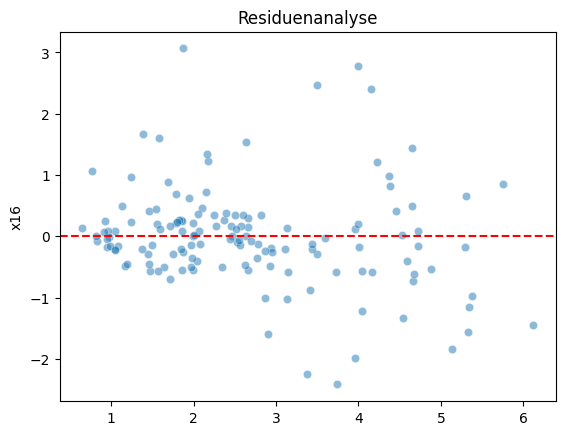

In [33]:
# Vorhersage auf Testdaten generieren
y_pred_test = model_rf.predict(X_test)

# Residuen berechnen (Differenz zwischen tatsächlichen und vorhergesagten Werten)
residuals = y_test - y_pred_test

# Streudiagramm der Residuen in Abhängigkeit von der Vorhersage zeichnen
sns.scatterplot(x=y_pred_test, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Referenzlinie bei Null
plt.title("Residuenanalyse")
plt.show()


# Aufgabe 5


In [ ]:
# Feature Auswahl
relevant_cols = [
    # 🍽️ Restaurant
    'x1',  # Meal, Inexpensive Restaurant
    'x2',  # Meal for 2 People, Mid-range Restaurant
    'x3',  # McMeal at McDonalds

    # 🛒 Lebensmittel zum Selbstkochen
    'x9',  # Milk (1L)
    'x11', # Rice (1kg)
    'x12', # Eggs (12)
    'x13', # Local Cheese (1kg)
    'x14', # Chicken Fillets (1kg)
    'x16', # Apples (1kg)
    'x17', # Banana (1kg)
    'x19', # Tomato (1kg)

    # 🏠 Wohnen
    'x48', # Apartment (1 bedroom) in City Centre
    'x49', # Apartment (1 bedroom) Outside of Centre
    'x50', # Apartment (3 bedrooms) in City Centre
    'x51', # Apartment (3 bedrooms) Outside of Centre

    # 🔌 Infrastruktur
    'x36', # Basic utilities (Electricity, Heating, Water, etc.)
    'x38', # Internet

    # 📶 Kommunikation (optional)
    'x37', # Prepaid Mobile Tariff

    # 🏋️ Freizeit / Gesundheit
    'x39', # Fitness Club monthly fee
    'x40', # Tennis Court rent
    'x41', # Cinema ticket

    # 🚌 Mobilität
    'x28', # One-way Ticket (Local Transport)
    'x29', # Monthly Pass
]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Beispiel: nur numerische Spalten nehmen

# Standardisieren
scaler = StandardScaler()

sse = []
sil_scores = []
X = scaler.fit_transform(data_tropical[relevant_cols])  

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sse.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))

# Plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(2,10), sse, marker='o')
plt.title('Elbow-Methode')
plt.xlabel('Anzahl Cluster')
plt.ylabel('SSE')

plt.subplot(1,2,2)
plt.plot(range(2,10), sil_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Anzahl Cluster')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

sse = []
sil_scores = []
X = scaler.fit_transform(data[relevant_cols])  

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sse.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))

# Plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(2,10), sse, marker='o')
plt.title('Elbow-Methode')
plt.xlabel('Anzahl Cluster')
plt.ylabel('SSE')

plt.subplot(1,2,2)
plt.plot(range(2,10), sil_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Anzahl Cluster')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


### Wahl der Clusteranzahl

Zur Bestimmung einer sinnvollen Clusteranzahl wurden die Elbow-Methode und der Silhouette-Score verwendet:

#### Für die Tropischen Daten gilt:

- Der **höchste Silhouette-Score** wurde bei **k = 2** erreicht, was auf eine gute Trennschärfe zwischen zwei großen Gruppen hinweist.
- Die **Elbow-Methode** zeigte jedoch bei **k = 5** einen deutlichen Knick, ab dem die Verbesserung der Clustering-Qualität nur noch marginal zunimmt.

Da wir die Städte nicht nur grob segmentieren, sondern auch **inhaltlich interpretierbare Gruppen** identifizieren wollen (z. B. hinsichtlich Infrastruktur, Kosten, Lebensstil), wurde **k = 5** gewählt. Diese Anzahl erlaubt eine differenzierte Analyse und steht im Einklang mit unseren Hypothesen.

#### Für die Globalen Daten gilt:

- Der **höchste Silhouette-Score** wurde bei **k = 5** erreicht, was auf eine gute Trennschärfe zwischen fünf großen Gruppen hinweist.
- Die **Elbow-Methode** zeigte ebenfalls bei **k = 5** einen deutlichen Knick, ab dem die Verbesserung der Clustering-Qualität nur noch marginal zunimmt.

Da wir die Städte gut segmentieren und dazu auch **inhaltlich interpretierbare Gruppen** identifizieren wollen (z. B. hinsichtlich Infrastruktur, Kosten, Lebensstil), wurde **k = 5** gewählt. Diese Anzahl erlaubt eine differenzierte Analyse und steht im Einklang mit unseren Hypothesen.


In [ ]:
X = scaler.fit_transform(data_tropical[relevant_cols])  

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)
cluster_means = data_tropical.copy()
cluster_means['cluster'] = kmeans.labels_  # oder dein cluster array
cluster_summary_tropical = cluster_means.groupby('cluster')[relevant_cols].mean()
print(cluster_summary_tropical)

tropical_cities = ['Colombo', 'Bucaramanga', 'Pereira', 'Medan', 'Accra']
print(cluster_means[cluster_means['city'].isin(tropical_cities)][['city', 'cluster']])


X = scaler.fit_transform(data[relevant_cols])  

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

data['cluster'] = kmeans.labels_  # oder dein cluster array
cluster_summary_global = data.groupby('cluster')[relevant_cols].mean()
print(cluster_summary_global)


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

sns.heatmap(cluster_summary_tropical.T, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Durchschnittliche Werte je Cluster")
plt.xlabel("Cluster")
plt.ylabel("Merkmal")
plt.tight_layout()

plt.subplot(1,2,2)
sns.heatmap(cluster_summary_global.T, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Durchschnittliche Werte je Cluster")
plt.xlabel("Cluster")
plt.ylabel("Merkmal")
plt.tight_layout()
plt.show()


### Bewertung der Cluster

Die 5 identifizierten Cluster lassen sich wie folgt charakterisieren:

- **Cluster 0 – "Günstig & Einfach"**  
  Sehr niedrige Kosten in allen Bereichen, dafür auch einfache bis eingeschränkte Infrastruktur und Freizeitmöglichkeiten.

- **Cluster 1 – "Teuer & Klassisch"**  
  Höhere Lebenshaltungskosten mit solider Infrastruktur. Städte in diesem Cluster bieten Qualität, sind aber nichts für ein kleines Budget.

- **Cluster 2 – "Teuer & Modern"**  
  Luxus-Städte mit hohen Ausgaben in allen Bereichen, aber auch sehr gutem Ausbau – wenig relevant für Remote Work mit Sparansatz.

- **Cluster 3 – "Mittelklasse mit Potenzial"**  
  Der ideale Kompromiss: solide Infrastruktur, bezahlbare Mieten, günstige Lebenshaltungskosten. Unsere Favoriten wie **Colombo** oder **Bucaramanga** liegen vermutlich in diesem Cluster.

- **Cluster 4 – "Unverhältnismäßig teuer"**  
  Extrem hohe Mietpreise, bei mäßigem Rest. Diese Städte bieten kein gutes Preis-Leistungs-Verhältnis.

Unsere Top 5 gewählten tropischen Städte befinden sich hauptsächlich in Cluster 0 damit bestätigt sich unsere Hypothese, dass tropische Regionen ein günstiges Preisniveau mit mittlerer Infrastruktur bieten.


In [ ]:
X = scaler.fit_transform(data[relevant_cols])  

kmeans = KMeans(n_clusters=5, random_state=42)

data_tropical['cluster'] = kmeans.fit_predict(scaler.transform(data_tropical[relevant_cols]))
tropische_verteilung = data_tropical.groupby('cluster').size()
print("Tropische Städte pro Cluster:")
print(tropische_verteilung)

data_non_tropical = data[~data.index.isin(data_tropical.index)].copy()
data_non_tropical['cluster'] = kmeans.fit_predict(scaler.transform(data_non_tropical[relevant_cols]))
nicht_tropisch_verteilung = data_non_tropical.groupby('cluster').size()
print("Nicht-tropische Städte pro Cluster:")
print(nicht_tropisch_verteilung)

gesamt = data.groupby('cluster').size()
anteil_tropisch = (tropische_verteilung / gesamt * 100).fillna(0).round(1)
anteil_nicht_tropisch = (nicht_tropisch_verteilung / gesamt * 100).fillna(0).round(1)

print("Anteil tropischer Städte pro Cluster (%):")
print(anteil_tropisch)

plt.figure(figsize=(10, 5))
bars = plt.bar(anteil_tropisch.index, anteil_tropisch.values, color='mediumseagreen')
plt.title('Anteil tropischer Städte je Cluster')
plt.xlabel('Cluster')
plt.ylabel('Anteil tropischer Städte (%)')
plt.ylim(0, 100)

# Prozentwerte über die Balken schreiben
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{height:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Analyse der Clusterverteilung: Tropische vs. Nicht-tropische Städte

Die folgende Tabelle zeigt, wie viele Städte aus tropischen bzw. nicht-tropischen Regionen in jedem Cluster vertreten sind und welchen Anteil tropische Städte dort ausmachen:

| Cluster | Tropisch | Nicht-tropisch | Anteil tropisch (%) |
|---------|----------|----------------|----------------------|
| 0       | 41       | 40             | **89.1 %**           |
| 1       | 11       | 310            | 2.9 %                |
| 2       | 22       | 122            | 13.4 %               |
| 3       | 1        | 259            | 1.8 %                |
| 4       | 3        | 114            | 1.1 %                |

---

### 🧠 Interpretation

- **Cluster 0 ist klar das "Tropen-Cluster"** – fast 90 % der Städte dort sind tropisch.  
  → Dieses Cluster ist in der Heatmap durch **niedrige Kosten in fast allen Kategorien** gekennzeichnet.

- **Cluster 1–4 werden stark von nicht-tropischen Städten dominiert**, insbesondere Cluster 1 und 3 (über 300 Städte aus Europa/Amerika).  
  → Diese Cluster zeichnen sich durch **höhere Preise, bessere Infrastruktur oder starke Ausreißer bei Mieten** aus.

---

### 📌 Fazit zur Hypothese 2

Die Hypothese:  
> *"Tropisch warme Länder haben tendenziell niedrigere Kosten als Europa und Nordamerika"*  

wird durch diese Clusterverteilung **deutlich gestützt**.

Tropische Städte sind **konzentriert in einem einzigen, günstigen Cluster**, während nicht-tropische Städte deutlich **breiter verteilt** und häufiger in den **teuren Clustern** zu finden sind.


## Aufg 6 Draft: 
### Anleitung für Remote Worker: Günstige & exotische Städte für 6 Monate Workation  

## Ziel
Diese Analyse unterstützt die Auswahl geeigneter tropisch-warmer Städte für einen sechsmonatigen Aufenthalt als Remote Worker in der Kreativbranche. Berücksichtigt wurden Lebenshaltungskosten, Infrastruktur, gesunde Ernährung und Freizeitmöglichkeiten.

---

## Überprüfung zentraler Hypothesen

### 1. Tropische Länder sind günstiger als Europa/Nordamerika ✅  
Die Analyse zeigt deutlich: Miet- und Lebensmittelkosten liegen in tropischen Ländern im Schnitt **deutlich unter** dem globalen Durchschnitt. Besonders in Südostasien und Lateinamerika lassen sich mit gleichem Budget spürbar höhere Lebensstandards erzielen.

### 2. Gute Infrastruktur geht mit höheren Kosten einher ⚠️  
Die Annahme trifft **teilweise** zu: Internet ist in tropischen Ländern im Durchschnitt **leicht teurer**, Grundversorgungskosten (Strom, Wasser) dagegen meist **günstiger**. Öffentlicher Nahverkehr ist in vielen Ländern sehr günstig. Die Korrelation zwischen Infrastrukturqualität und Preisniveau ist daher **nicht eindeutig**, sondern stark lokal abhängig.

### 3. Höhere Gehälter → höhere Wohnkosten ✅  
Ein klarer Zusammenhang wurde bestätigt: Städte mit hohem lokalem Einkommen (z. B. in Europa oder Nordamerika) weisen auch signifikant höhere Mietpreise auf. Tropische Städte mit niedrigem Durchschnittsgehalt bieten dagegen günstigen Wohnraum – ein Vorteil für Remote Worker mit externem Einkommen.

### 4. Transportkosten sind invers zu lokalen Einkommen ✅  
In Ländern mit niedrigem Einkommen sind die Kosten für Busse und Taxis meist ebenfalls **niedrig**. Dies ist für einen sechsmonatigen Aufenthalt ohne eigenes Fahrzeug besonders relevant und bestätigt die Hypothese.

### 5. Freizeitkosten als Indikator für urbanen Lebensstandard ✅  
Tatsächlich zeigen Städte mit höherem Freizeitpreisniveau (z. B. Sportangebote) auch höhere Lebensstandards. Besonders Städte wie Colombo und Pereira bieten dabei ein gutes Verhältnis von Preis und Qualität, was sie für einen aktiven Lebensstil attraktiv macht.

---

## Zentrale Erkenntnisse

### 🌴 Lebenshaltungskosten
- **Mieten & Immobilien**: Tropische Städte bieten im Schnitt deutlich niedrigere Mietkosten (v. a. Kolumbien, Indonesien).
- **Lebensmittel**: Besonders Obst, Gemüse und Grundnahrungsmittel sind in tropischen Regionen günstiger.
- **Gehälter**: Lokale Einkommen sind niedriger, was aber für Remote Worker irrelevant ist.

### 🌐 Infrastruktur & Freizeit
- **Internet**: Leicht teurer, aber stabil; wichtigste Ausreißer: Karibik & Afrika.
- **Freizeit & Sport**: Moderate bis günstige Preise, gute Möglichkeiten für aktiven Lebensstil.
- **Transport**: Öffentliche Verkehrsmittel sind sehr günstig – ideal für längere Aufenthalte ohne Auto.

---

## Unsere Top 5 Städte für Remote Work

| Stadt         | Land         | Begründung                                                                 |
|---------------|--------------|----------------------------------------------------------------------------|
| **Colombo**   | Sri Lanka    | Bestes Gesamtpaket: Top Internet, Freizeit, günstiges Wohnen               |
| **Bucaramanga** | Kolumbien | Sehr günstig, besonders stark bei Lebensmitteln und Mieten                 |
| **Pereira**   | Kolumbien    | Ausgewogenes Kostenprofil, gute Freizeitmöglichkeiten                     |
| **Medan**     | Indonesien   | Beste Wohnkosten, gute Restaurantpreise, stabile Infrastruktur             |
| **Accra**     | Ghana        | Gute Infrastruktur, günstige Freizeit & Kleidung – afrikanische Alternative |

---

## Fazit
Tropisch warme Städte sind nicht nur klimatisch attraktiv, sondern auch ökonomisch interessant. Die besten Optionen finden sich in Südostasien, Lateinamerika und Afrika. Besonders hervorzuheben ist **Colombo** mit dem stärksten Gesamtprofil – ideal für Remote Work mit Fokus auf Lebensqualität und Kostenbewusstsein.

## Veränderungen

### !Emojis wegmachen!

Wissenschaftlicher

Hypothese 1 Tauschen

Mehr auf Hypothesen eingehen

Ausgangsituation bisschen ändern

Nr. 2 etwas mehr begründung

Nr. 3 wording ändern

Nr. 4 Mehr Markdown

Nr. 5 Mehr auf Hypothesen eingehen

Nr. 6 Fast komplett überarbeiten (Inhalt)